# 1.4

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.loc[df.lunch == 'standard'].mean()

math score       70.034109
reading score    71.654264
writing score    70.823256
dtype: float64

In [ ]:
df[df.lunch == 'standard'].mean()

math score       70.034109
reading score    71.654264
writing score    70.823256
dtype: float64

In [ ]:
df.loc[df.lunch == 'free/reduced'].mean()

math score       58.921127
reading score    64.653521
writing score    63.022535
dtype: float64

In [ ]:
df.loc[df.lunch == 'standard'].var()

math score       186.418089
reading score    191.285560
writing score    205.620887
dtype: float64

In [ ]:
df.loc[df.lunch == 'free/reduced'].var()

math score       229.824270
reading score    221.871139
writing score    238.202881
dtype: float64

In [ ]:
df=df.rename(columns={'parental level of education':'parental_level_of_education','test preparation course':'test_preparation_course',
                     'math score':'math_score', 'reading score':'reading_score', 'writing score':'writing_score'})

In [ ]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 1.5

In [ ]:
df.query("writing_score>70").head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


In [ ]:
df[df["writing_score"]>70].head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


In [ ]:
df.query("gender=='female'").head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [ ]:
df.loc[df["gender"]=='female'].head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [ ]:
list(df)

['gender',
 'race/ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [ ]:
score_columns=[i for i in list(df) if 'score' in i]

In [ ]:
df[score_columns].head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [ ]:
df.filter(like='score').head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [ ]:
df2 = pd.read_csv('https://stepik.org/media/attachments/course/4852/column_hell.csv')

In [ ]:
selected_columns=df2.filter(like='-')
selected_columns.head()

,umeca-4,kudbpyw-3,g-3,v-9,fla-6,hwtbyrkp-5
0,0.016124,0.430787,0.202407,0.725508,0.305076,0.979296
1,0.507115,0.671662,0.864249,0.867818,0.358859,0.160520
2,0.003274,0.286411,0.928865,0.719159,0.340235,0.734612
3,0.784139,0.863717,0.175446,0.554744,0.049325,0.621132
4,0.011265,0.206172,0.044151,0.163643,0.048806,0.437836


# 1.6

In [ ]:
df.groupby('gender').mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [ ]:
df.groupby('gender').aggregate({'math_score':'mean', 'reading_score':'mean'})

,math_score,reading_score
gender,,
female,63.633205,72.608108
male,68.728216,65.473029


In [ ]:
df.groupby('gender', as_index=False).aggregate({'math_score':'mean', 'reading_score':'mean'})

,gender,math_score,reading_score
0,female,63.633205,72.608108
1,male,68.728216,65.473029


In [ ]:
df.groupby('gender', as_index=False).\
  aggregate({'math_score':'mean', 'reading_score':'mean'}).\
  rename(columns={'math_score':'mean_math_score', 'reading_score':'mean_reading_score'})

,gender,mean_math_score,mean_reading_score
0,female,63.633205,72.608108
1,male,68.728216,65.473029


In [ ]:
df.groupby(['gender', 'race/ethnicity'],as_index=False).\
  aggregate({'math_score':'mean', 'reading_score':'mean'}).\
  rename(columns={'math_score':'mean_math_score', 'reading_score':'mean_reading_score'})

,gender,race/ethnicity,mean_math_score,mean_reading_score
0,female,group A,58.527778,69.000000
1,female,group B,61.403846,71.076923
2,female,group C,62.033333,71.944444
3,female,group D,65.248062,74.046512
4,female,group E,70.811594,75.840580
5,male,group A,63.735849,61.735849
6,male,group B,65.930233,62.848837
7,male,group C,67.611511,65.424460
8,male,group D,69.413534,66.135338
9,male,group E,76.746479,70.295775


In [ ]:
mean_scores=df.groupby(['gender', 'race/ethnicity']).\
  aggregate({'math_score':'mean', 'reading_score':'mean'}).\
  rename(columns={'math_score':'mean_math_score', 'reading_score':'mean_reading_score'})

In [ ]:
mean_scores

mean_math_score  mean_reading_score
gender race/ethnicity                                     
female group A               58.527778           69.000000
       group B               61.403846           71.076923
       group C               62.033333           71.944444
       group D               65.248062           74.046512
       group E               70.811594           75.840580
male   group A               63.735849           61.735849
       group B               65.930233           62.848837
       group C               67.611511           65.424460
       group D               69.413534           66.135338
       group E               76.746479           70.295775

In [ ]:
mean_scores.loc[[('female', 'group A'),('female', 'group B')]]

mean_math_score  mean_reading_score
gender race/ethnicity                                     
female group A               58.527778           69.000000
       group B               61.403846           71.076923

In [ ]:
df.groupby(['gender', 'race/ethnicity']).math_score.nunique()

gender  race/ethnicity
female  group A           29
        group B           51
        group C           59
        group D           53
        group E           44
male    group A           38
        group B           43
        group C           56
        group D           49
        group E           38
Name: math_score, dtype: int64

In [ ]:
df.sort_values(['gender', 'math_score'], ascending=False).groupby('gender').head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


In [ ]:
df['total_score']=df.math_score+df.reading_score+df.writing_score
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [ ]:
df=df.assign(total_score_log=np.log(df.total_score))
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722


In [ ]:
df.drop(['total_score'], axis=1).head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,5.384495
1,female,group C,some college,standard,completed,69,90,88,5.509388
2,female,group B,master's degree,standard,none,90,95,93,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,4.997212
4,male,group C,some college,standard,none,76,78,75,5.433722


In [ ]:
df3=pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')
df3.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [ ]:
df3.loc[df3.legs==0].size

88

In [ ]:
df3.loc[df3.legs==8].size

8

In [ ]:
df3.groupby(['legs']).size()

legs
0    11
2    95
4     7
6     3
8     1
dtype: int64

In [ ]:
df4=pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv')

In [ ]:
df4.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [ ]:
df4.groupby(['Executor', 'Type']).mean()

Unnamed: 0      Salary
Executor Type                        
Loopa    A      46.000000   58.000000
         B      24.000000  145.166667
         C      31.666667  154.333333
         D      31.857143  137.714286
         E      23.500000  164.000000
         F      20.000000  238.000000
Pupa     A      16.000000  160.833333
         B      41.000000   77.000000
         C      23.000000   74.500000
         D      14.000000  146.500000
         E      19.800000  131.200000
         F      25.750000  136.250000

In [ ]:
df4.groupby(['Executor', 'Type']).aggregate({'Salary':'mean'})

Salary
Executor Type            
Loopa    A      58.000000
         B     145.166667
         C     154.333333
         D     137.714286
         E     164.000000
         F     238.000000
Pupa     A     160.833333
         B      77.000000
         C      74.500000
         D     146.500000
         E     131.200000
         F     136.250000

In [ ]:
df3.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [ ]:
df3.groupby(['attack_type', 'primary_attr']).aggregate({'primary_attr':'size'})

primary_attr
attack_type primary_attr              
Melee       agi                     19
            int                      2
            str                     35
Ranged      agi                     18
            int                     40
            str                      3

In [ ]:
df3.groupby(['attack_type', 'primary_attr']).aggregate({'primary_attr':'count'})

primary_attr
attack_type primary_attr              
Melee       agi                     19
            int                      2
            str                     35
Ranged      agi                     18
            int                     40
            str                      3

In [ ]:
df5=pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')
df5.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [ ]:
mean_concentrations=df5.groupby(['genus']).mean()
mean_concentrations

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [ ]:
df5.loc[df5.genus=='Fucus']

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203


In [ ]:
df5.loc[df5.genus=='Fucus']['alanin'].round(2)

0    3.71
2    0.35
3    6.64
Name: alanin, dtype: float64

In [ ]:
print(round(df5.loc[df5.genus=='Fucus']['alanin'].min(),2),\
      round(df5.loc[df5.genus=='Fucus']['alanin'].mean(),2),\
      round(df5.loc[df5.genus=='Fucus']['alanin'].max(),2))

0.35 3.57 6.64


In [ ]:
df5.groupby('group').aggregate({'sucrose': lambda x: max(x) - min(x) })


,sucrose
group,
brown,5.189345
green,3.259662
red,0.000000


In [ ]:
df5.groupby('group').count()

,species,genus,sucrose,alanin,citrate,glucose,oleic_acid
group,,,,,,,
brown,6,6,6,6,6,6,6
green,3,3,3,3,3,3,3
red,1,1,1,1,1,1,1


In [ ]:
df5.groupby('group').var()

,sucrose,alanin,citrate,glucose,oleic_acid
group,,,,,
brown,5.459098,7.220351,5.468942,1.767756,4.385233
green,2.672626,7.059917,3.950113,0.266265,0.540388
red,NaN,NaN,NaN,NaN,NaN


# 1.7

**Matplotlib**

---









In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722


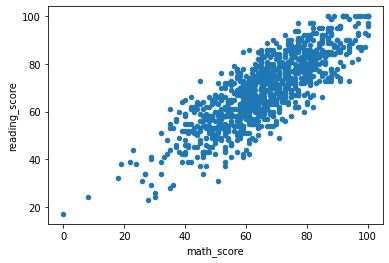

In [ ]:
df.plot.scatter(x='math_score', y='reading_score')

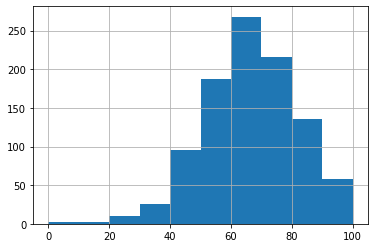

In [ ]:
df.math_score.hist()

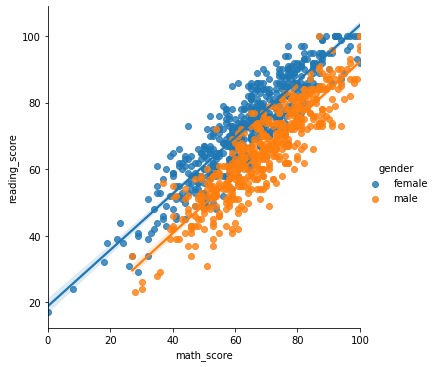

In [ ]:
sns.lmplot(x='math_score', y='reading_score', hue='gender', data=df)

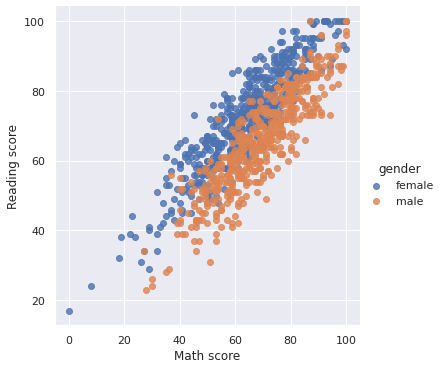

In [ ]:
ax=sns.lmplot(x='math_score', y='reading_score', hue='gender', data=df, fit_reg=False)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

In [ ]:
df6=pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')
df6.head()

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


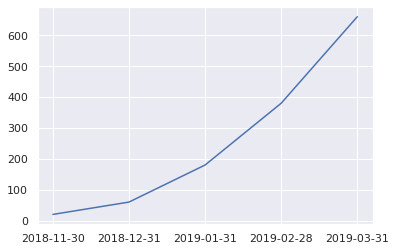

In [ ]:
plt.plot(df6.index, df6.income)

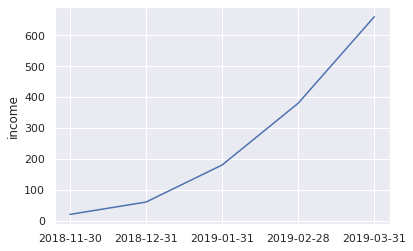

In [ ]:
sns.lineplot(x=df6.index, y=df6.income)

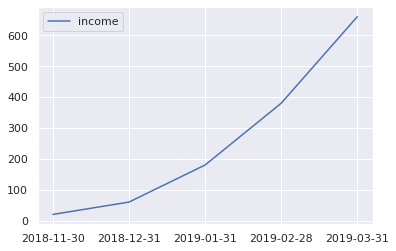

In [ ]:
sns.lineplot(data=df6)

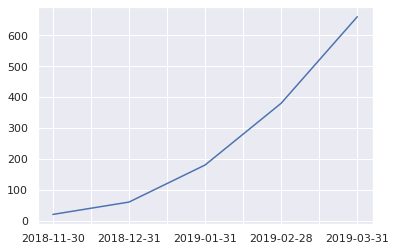

In [ ]:
df6['income'].plot()

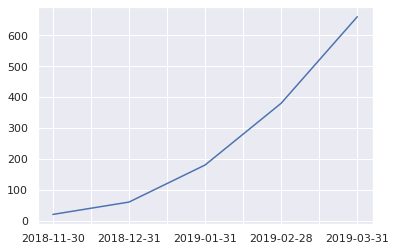

In [ ]:
df6.income.plot()

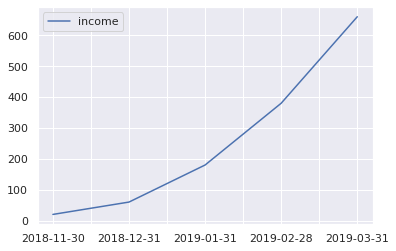

In [ ]:
df6.plot(kind='line')

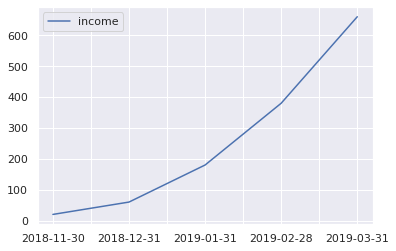

In [ ]:
df6.plot()

In [ ]:
df6=pd.read_csv("/content/dataset_209770_6.txt", sep=" "
# , header=None
)
df6.head()

,x,y
0,1507.981519,194.964574
1,996.211920,798.119637
2,1490.159829,191.709960
3,987.536344,794.577423
4,1495.402641,198.467100


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


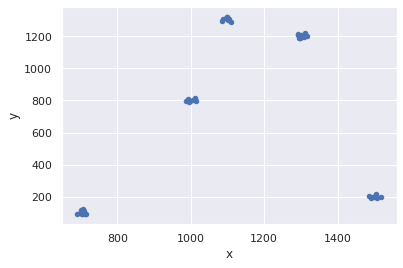

In [ ]:
df6.plot.scatter(x='x', y='y')

Почему не сказали об этом божественно-удобном методе? ---> data=pd.read_clipboard()

Данный метод автоматом пропускает скопированный в буффер текст через pd.read_csv и подбирает автоматом параметры. Нет нужны скачивать малые файлы на машину, когда можно просто ctrl+c ---> data=pd.read_clipboard(). 

Очень удобно.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


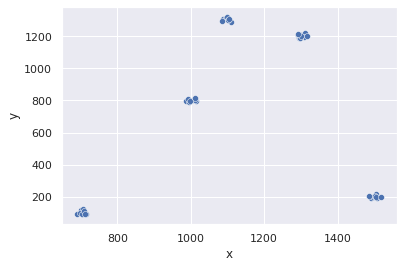

In [ ]:
df6 = pd.read_csv("/content/dataset_209770_6.txt", sep=' ')
sns.scatterplot(df6.iloc[:, 0], df6.iloc[:, 1])

In [ ]:
df7=pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv', index_col=0)
df7.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


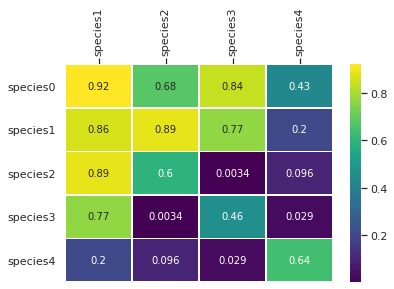

In [ ]:
g = sns.heatmap(df7.iloc[:,1:], annot=True, linewidths=.5, cmap='viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

In [ ]:
df8=pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')
df8.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


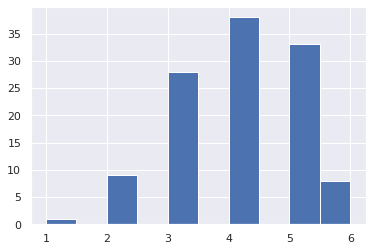

In [ ]:
df8['cnt'] = df8.roles.str.count(',')+1
df8.cnt.hist()

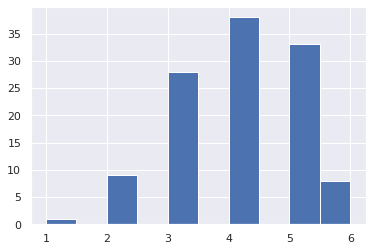

In [ ]:
df8['role_count'] = df8.roles.map(lambda x: len(eval(x)))
df8.role_count.hist()

In [ ]:
df9=pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv')
df9.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

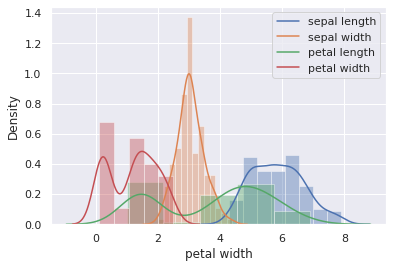

In [ ]:
df9_2=df9.iloc[:,1:-1]
for column in df9_2:
  sns.distplot( df9_2[column], label=column)
#plt.figure(figsize=(10,10))
plt.legend(df9_2)

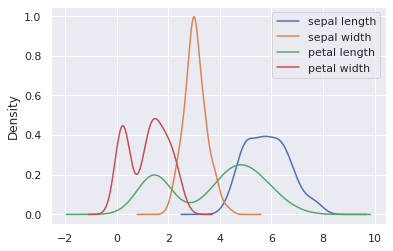

In [ ]:
for i in df9.iloc[:, 1:-1]:
    df9[str(i)].plot(kind='kde',legend=True)

sepal length    AxesSubplot(0.125,0.125;0.775x0.755)
sepal width     AxesSubplot(0.125,0.125;0.775x0.755)
petal length    AxesSubplot(0.125,0.125;0.775x0.755)
petal width     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

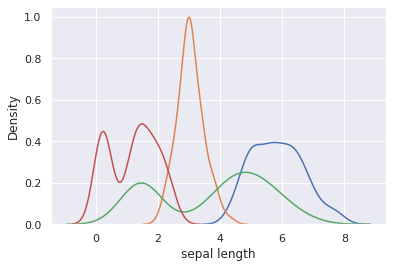

In [ ]:
df9.iloc[:,1:5].apply(lambda x: sns.kdeplot(x))

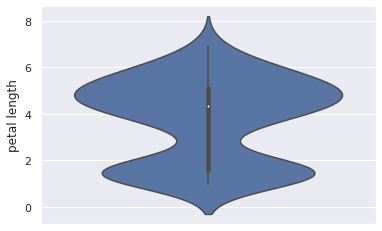

In [ ]:
sns.violinplot(y=df9["petal length"])

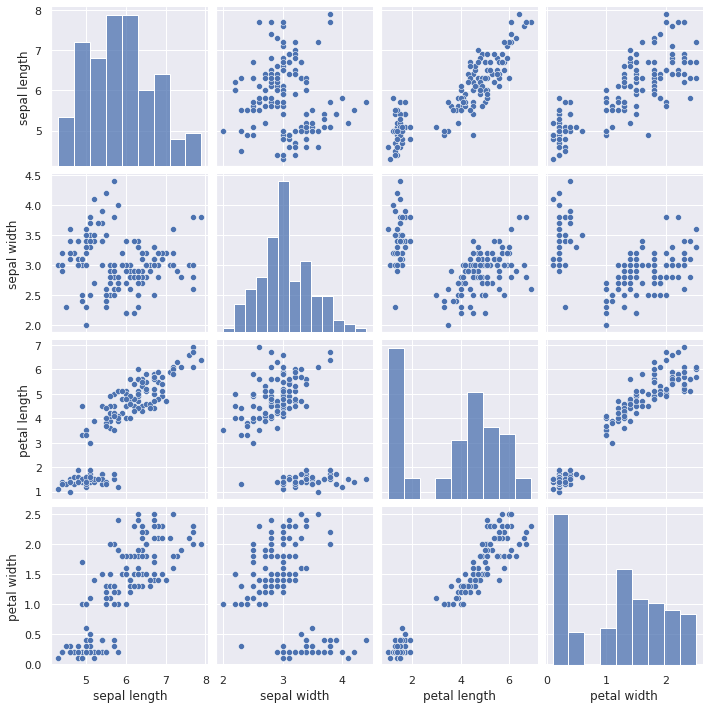

In [ ]:
sns.pairplot(df9_2)

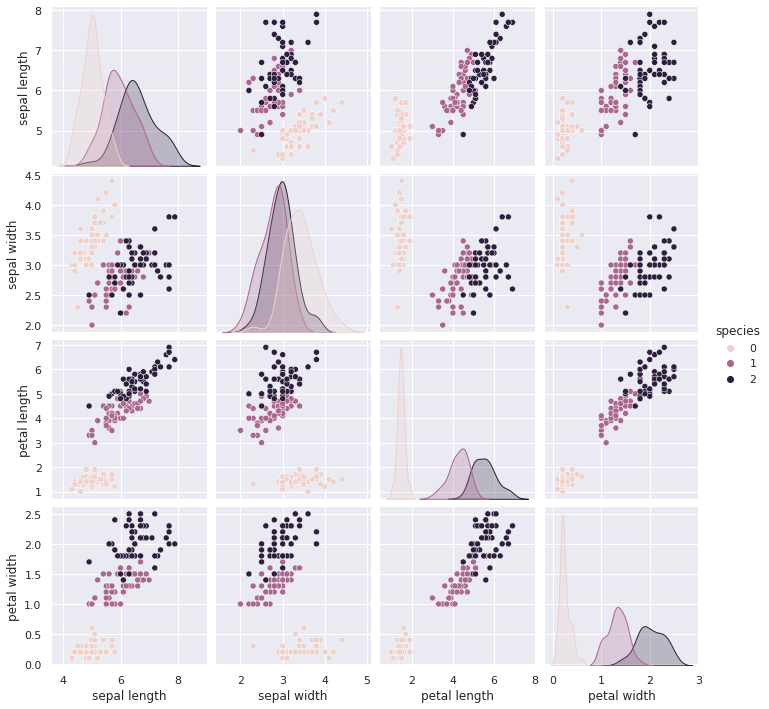

In [ ]:
sns.pairplot(df9, hue='species', vars=['sepal length', 'sepal width', 'petal length', 'petal width'])

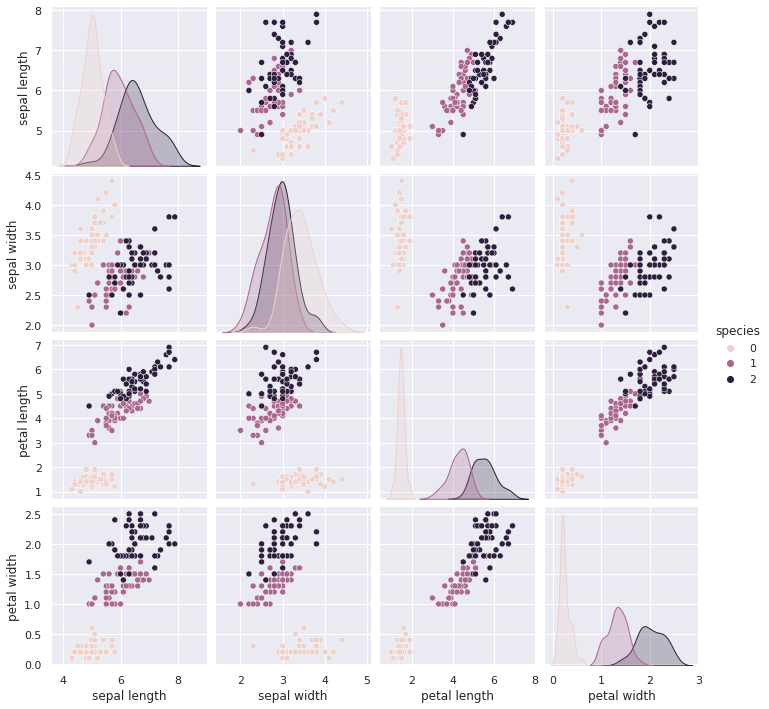

In [ ]:
sns.pairplot(df9, vars=df9.columns[1:5], hue="species")

# 1.8

[Любым](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) удобным для вас способом создайте dataframe c именем my_data, в котором две колонки c именами (type  и value) и четыре строки:

In [ ]:
import pandas as pd
import numpy as np
my_data = pd.DataFrame(np.array([['A',10], ['A',14], ['B', 12], ['B', 23]]), columns=['type','value']) 
my_data

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


In [ ]:
import pandas as pd
d = {'type': ['A', 'A', 'B', 'B'], 'value': [10,14,12,23]}
my_data = pd.DataFrame(data=d)
my_data

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


In [ ]:
my_stat=pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')


В переменную с именем subset_1 сохраните только первые 10 строк и только 1 и 3 колонку.


In [ ]:
subset_1=my_stat.iloc[:10].iloc[:,[0,2]]

В переменную с именем subset_2 сохраните все строки кроме 1 и 5 и только 2 и 4 колонку.



In [ ]:
subset_2=my_stat.drop([0,4], axis=0).drop(my_stat.columns[[0,2]], axis='columns')

В переменную subset_1 сохраните только те наблюдения, у которых значения переменной V1  строго больше 0, и значение переменной V3  равняется 'A'.

In [ ]:
subset_1=my_stat.query('V1>0 & V3=="A"')

В переменную  subset_2  сохраните только те наблюдения, у которых значения переменной V2  не равняются 10, или значения переменной V4 больше или равно 1

In [ ]:
subset_2=my_stat.query('V2 != 10 | V4 >= 1')

или так

---
subset_1 = my_stat[(my_stat.V1 > 0) & (my_stat.V3 == 'A')]

---
subset_2 = my_stat[(my_stat.V2 != 10) | (my_stat.V4 >= 1)]


Теперь давайте преобразуем наши данные. В данных my_stat создайте две новые переменных:

V5 = V1 + V4

In [ ]:
my_stat['V5']=my_stat.V1+my_stat.V4
my_stat.head()

,V1,V2,V3,V4,V5
0,2,13.0,B,1.0,3.0
1,-1,7.0,B,1.0,0.0
2,0,11.0,A,0.0,0.0
3,2,11.0,A,2.0,4.0
4,0,10.0,B,-1.0,-1.0


V6 = натуральный логарифм переменной V2

In [ ]:
my_stat=my_stat.assign(V6=np.log(my_stat.V2))
my_stat.head()

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


In [ ]:
my_stat['V6']=np.log(my_stat.V2)
my_stat.head()

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


[Переименуйте](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.rename.html) колонки в данных  my_stat следующим образом:

V1 -> session_value

V2 -> group

V3 -> time

V4 -> n_users

In [ ]:
my_stat=my_stat.rename({"V1":"session_value", "V2":"group", "V3":"time", "V4":"n_users" }, axis = 1)
my_stat.head()

,session_value,group,time,n_users,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


In [ ]:
my_stat =pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_na.csv')

В переменной session_value [замените](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html) все пропущенные значения на нули.

В переменной n_users замените все отрицательные значения на [медианное](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html) значение переменной n_users (без учета отрицательных значений, разумеется). Помогло [это](https://stackoverflow.com/questions/44890713/selection-with-loc-in-python) и [это](http://qaru.site/questions/188936/pandas-dataframe-replace-all-values-in-a-column-based-on-condition)

In [ ]:
my_stat=my_stat.fillna(value={"session_value":0})
my_stat.head()

,group,n_users,session_value,time
0,9.0,-9.0,1.0,A
1,10.0,8.0,2.0,B
2,10.0,-1.0,4.0,A
3,10.0,-0.0,0.0,B
4,9.0,-15.0,-1.0,B


In [ ]:
# my_stat.loc[my_stat.n_users >= 0, 'n_users'].median()

my_stat.loc[my_stat['n_users'] < 0, 'n_users'] = my_stat.loc[my_stat.n_users >= 0, 'n_users'].median()
# df.loc[df.lunch == 'standard'].mean()
# my_stat.query('n_users>=0').median()
my_stat.head()

,group,n_users,session_value,time
0,9.0,7.0,1.0,A
1,10.0,8.0,2.0,B
2,10.0,7.0,4.0,A
3,10.0,-0.0,0.0,B
4,9.0,7.0,-1.0,B


Чуть не забыли, никакой анализ данных не обходится без агрегации наблюдений. Напомню, в pandas с этим нам поможет связка  groupby + некоторое преобразование. Например:

/# число наблюдений в каждой группе

df.groupby('group_var').count()

Для того, что бы сгруппировать данные по нескольким переменным, используем список с нужными именами:

df.groupby(['group_var_1', 'group_var_2']).count()

Обратите внимание, что при такой записи группирующие переменные станут индексами в итоговом dataframe, изучите [справку](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) по groupby, чтобы разобраться со всеми тонкостями группировки данных. Также функция count() применится ко всем колонкам, что не всегда является желанным результатом. Чтобы применить функцию только к нужной колонке в данных, можно использовать связку  groupby() +  [agg()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

my_stat.groupby('group').agg({'n_users': 'count'})

В этой задаче для данных my_stat рассчитайте среднее значение переменной session_value для каждой группы (переменная group), в получившемся dataframe  переменная group не должна превратиться в индекс. Также переименуйте колонку со средним значением session_value в mean_session_value.

Получившийся результат сохраните в dataframe с именем mean_session_value_data.

In [ ]:
mean_session_value_data=my_stat.groupby('group', as_index=False).agg({'session_value': 'mean'}).\
  rename(columns={'session_value':'mean_session_value'})
mean_session_value_data

,group,mean_session_value
0,7.0,0.000000
1,8.0,-0.294118
2,9.0,0.151786
3,10.0,-0.047368
4,11.0,0.112000
5,12.0,-0.382353
6,13.0,0.000000


# 1.10



---

Практическим проектом нашего курса будет анализ активности студентов онлайн курса [Введение в анализ данных в R](https://stepik.org/course/129/syllabus), спасибо команде stepik, что предоставили анонимизированные данные.

В этом модуле, мы разберемся с задачей, начнем исследовать данные, а об условиях соревнований, призах и тайных стэпах раскажу во втором модуле!

Описание данных:

[events_train.csv ](https://stepik.org/media/attachments/course/4852/event_data_train.zip)- данные о действиях, которые совершают студенты со стэпами

step_id - id стэпа

user_id - анонимизированный id юзера

timestamp - время наступления события в формате unix date

action - событие, возможные значения: 

discovered - пользователь перешел на стэп

viewed - просмотр шага,

started_attempt - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага

passed - удачное решение практического шага


[submissions_train.csv](https://stepik.org/media/attachments/course/4852/submissions_data_train.zip) - данные о времени и статусах сабмитов к практическим заданиям

step_id - id стэпа

timestamp - время отправки решения в формате unix date

submission_status - статус решения

user_id - анонимизированный id юзера

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
events_data = pd.read_csv(
    'https://stepik.org/media/attachments/course/4852/event_data_train.zip', compression ='zip')

In [ ]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [ ]:
submissions_data = pd.read_csv(
    'https://stepik.org/media/attachments/course/4852/submissions_data_train.zip', compression ='zip')

In [ ]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [ ]:
events_data['date']=pd.to_datetime(events_data.timestamp, unit = 's')

In [ ]:
submissions_data['date']=pd.to_datetime(submissions_data.timestamp, unit = 's')

In [ ]:
events_data.date.min()

Timestamp('2015-06-15 04:00:48')

Работа с временем и датой - очень важный аспект в мире Data Science. Практически все базы данных используют timestamp для определения времени события, в машинном обучении есть целое направление - анализ временных рядов, для аналитики продукта очень важно понимать, как располагаются события во времени. 

Подготовил для вас несколько полезных статей:

[Работы с датой в Pandas](https://medium.com/datadriveninvestor/how-to-work-with-dates-in-pandas-like-a-pro-a84055a4819d) и [еще один вариант](https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/)

[Работа с датой в Python при помощи модуля datetime](https://python-scripts.com/datetime-time-python)

In [ ]:
events_data['day']=events_data.date.dt.date

In [ ]:
submissions_data['day']=submissions_data.date.dt.date

In [ ]:
events_data.groupby('day').user_id.nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

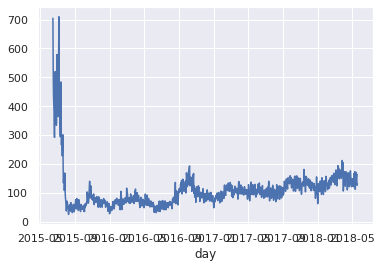

In [ ]:
events_data.groupby('day').user_id.nunique().plot()

In [ ]:
sns.set(rc={'figure.figsize':(9,6)})

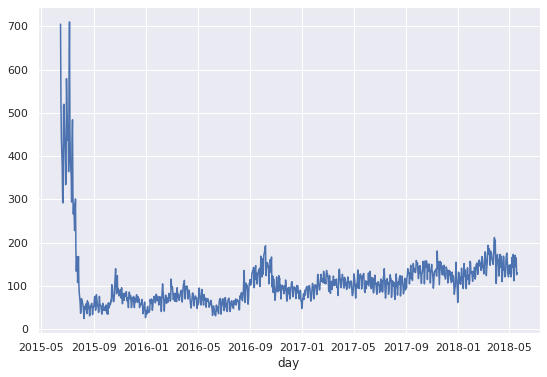

In [ ]:
events_data.groupby('day').user_id.nunique().plot()

In [ ]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [ ]:
events_data[events_data.action=='passed'].groupby('user_id', as_index=False).agg({'step_id':'count'}) \
  .rename(columns={'step_id':'passed_steps'}).head()

,user_id,passed_steps
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84


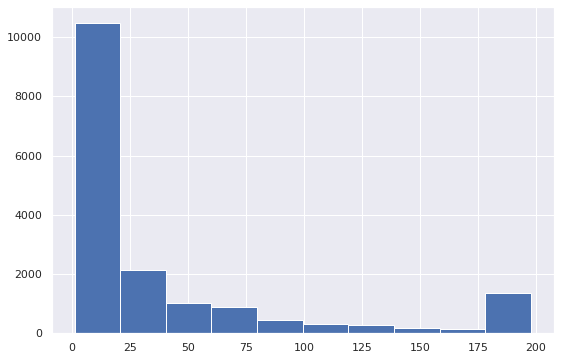

In [ ]:
events_data[events_data.action=='passed'].groupby('user_id', as_index=False).agg({'step_id':'count'}) \
  .rename(columns={'step_id':'passed_steps'}).passed_steps.hist()

Это неправильное решение т к

In [ ]:
events_data[events_data.action=='passed'].groupby('user_id', as_index=False).agg({'step_id':'count'}) \
  .rename(columns={'step_id':'passed_steps'}).passed_steps.min()

1

вот правильное решение

In [ ]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [ ]:
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).head()

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1


In [ ]:
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0) \
  .reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [ ]:
users_events_data = events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0) \
  .reset_index()

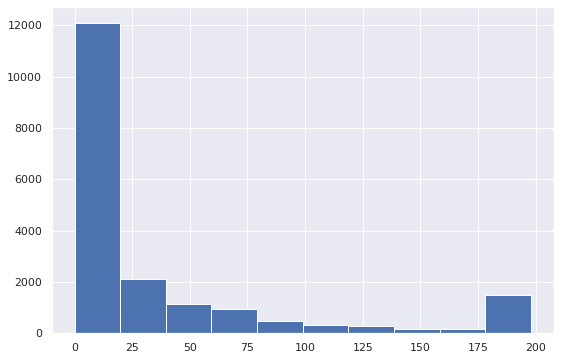

In [ ]:
users_events_data.discovered.hist()

In [ ]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


# 1.11

В этом уроке познакомимся с[ merge и join](http://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) в Pandas
А также рассмотрим продвинутый прием по работе с данными при помощи метода [apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

In [ ]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [ ]:
users_scores=submissions_data.pivot_table(index='user_id', columns='submission_status', 
                                          values='step_id', aggfunc='count', fill_value=0).reset_index()

In [ ]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [ ]:
events_data[['step_id', 'user_id']].head()

,step_id,user_id
0,32815,17632
1,32815,17632
2,32815,17632
3,32811,17632
4,32811,17632


In [ ]:
events_data[['step_id', 'user_id']].head().drop_duplicates()

,step_id,user_id
0,32815,17632
3,32811,17632


In [ ]:
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']).head()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230


In [ ]:
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
  .groupby('user_id')['timestamp'].apply(list).head()

user_id
1                                         [1472827464]
2                             [1514383364, 1519226966]
3    [1434358476, 1441257725, 1441440209, 144153391...
5                             [1466156809, 1499859621]
7                                         [1521634660]
Name: timestamp, dtype: object

In [ ]:
np.diff([1,2,5])

array([1, 3])

In [ ]:
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
  .groupby('user_id')['timestamp'].apply(list).apply(np.diff).head()

user_id
1                                                  []
2                                           [4843602]
3    [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                          [33702812]
7                                                  []
Name: timestamp, dtype: object

In [ ]:
gap_data=events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
  .groupby('user_id')['timestamp'].apply(list).apply(np.diff).values
gap_data

array([array([], dtype=int64), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
          98252,    57019]),
       array([1567990]), array([], dtype=int64)], dtype=object)

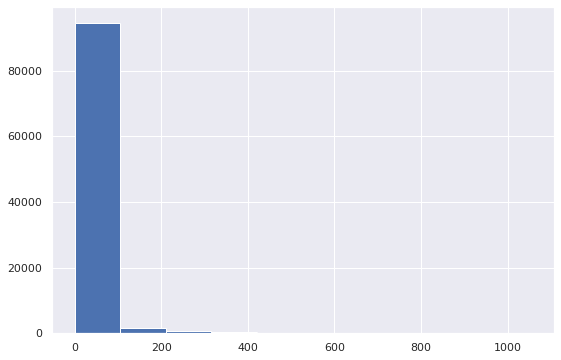

In [ ]:
gap_data=pd.Series(np.concatenate(gap_data, axis=0))
gap_data=gap_data/(24*60*60)
gap_data.hist()

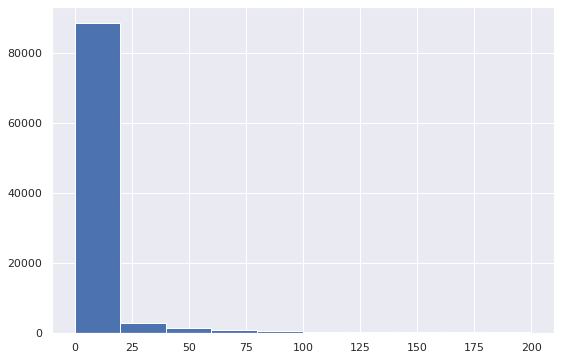

In [ ]:
gap_data[gap_data <200].hist()

In [ ]:
gap_data.quantile(0.95)

59.760440972222156

А пока что вот вам хакерская задача, за каким вымышленным id скрывается Анатолий Карпов - автор курса, данные которого мы анализируем?

In [ ]:
search_data = events_data[events_data.action=='viewed'].groupby('user_id', as_index=False).agg({'step_id':'count'}) \
  .rename(columns={'step_id':'viewed_steps'})
search_data.head()

,user_id,viewed_steps
0,1,1
1,2,10
2,3,192
3,5,12
4,7,1


In [ ]:
search_data.sort_values(by=['viewed_steps'], axis=0, ascending=False).head()

,user_id,viewed_steps
15001,20907,32778
7777,10794,16089
18144,25279,9693
781,1046,8122
2609,3572,6968


In [ ]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [ ]:
search_data3=submissions_data.pivot_table(index='user_id', columns='submission_status', 
                                          values='step_id', aggfunc='count', fill_value=0).reset_index()
search_data3.sort_values(by=['correct'], axis=0, ascending=False).head()

submission_status,user_id,correct,wrong
439,1046,421,513
2099,5552,186,93
6415,17135,168,177
2344,6183,142,65
3208,8461,135,42


In [ ]:
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset = ['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list).apply(len).sort_values(ascending=[False]).head()

user_id
1046     478
13268    385
4374     327
10794    281
3572     236
Name: timestamp, dtype: int64

поехали дальше

In [ ]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [ ]:
users_data = events_data.groupby('user_id', as_index = False) \
  .agg({'timestamp':'max'}).rename(columns={'timestamp': 'last_timestamp'})
users_data.head()

,user_id,last_timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660


пороговое значение 

In [ ]:
now = 1526772811
drop_out_threshold = 30*24*60*60

In [ ]:
users_data['is_gone_user']=(now - users_data.last_timestamp) > drop_out_threshold

In [ ]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [ ]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [ ]:
users_data.merge(users_scores).head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,2,1519226966,True,2,0
1,3,1444581588,True,29,23
2,5,1499859939,True,2,2
3,8,1481466913,True,9,21
4,14,1436368676,True,0,1


ведим что пропал 1-й юзер, поэтому

In [ ]:
users_data.merge(users_scores, how = 'outer').head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN


In [ ]:
users_data = users_data.merge(users_scores, on = 'user_id', how = 'outer')

In [ ]:
users_data = users_data.fillna(0)

In [ ]:
users_data = users_data.merge(users_events_data, how = 'outer')

In [ ]:
users_days = events_data.groupby('user_id').day.nunique()

In [ ]:
users_days.head()

user_id
1    1
2    2
3    7
5    2
7    1
Name: day, dtype: int64

In [ ]:
users_days.to_frame().head()

,day
user_id,
1,1
2,2
3,7
5,2
7,1


In [ ]:
users_days.to_frame().reset_index().head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [ ]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [ ]:
users_data = users_data.merge(users_days, how = 'outer')

In [ ]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


обязательно проверяем что мы никого не потеряли

In [ ]:
users_data.user_id.nunique()

19234

In [ ]:
events_data.user_id.nunique()

19234

In [ ]:
users_data['passed_corse'] = users_data.passed > 170

In [ ]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [ ]:
users_data.groupby('passed_corse').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_corse,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


Обязательно запомните [типы merge и join](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html), это справделиво не только для Pandas, но и для работы с базами данных.

![alt text](https://ucarecdn.com/f03da508-b426-42c6-be37-ccd7627ca8a4/)

![alt text](https://ucarecdn.com/4614d509-542e-44ca-ad74-ca27b78ad787/)